In [57]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df
df=df.drop_duplicates()
df
print(df.to_string())
df.isnull()
df.isnull().sum()
new_df=df.dropna()
new_df.isnull().sum()
print(df.duplicated().to_string())
new_df.drop(['best_book_id','goodreads_book_id','work_id','isbn','isbn13','original_publication_year','language_code','image_url'], axis=1)
harry_potter_books = new_df[new_df['original_title'].str.contains('Harry Potter', case=False)]
most_selling_book = harry_potter_books.loc[harry_potter_books['work_text_reviews_count'].idxmax()]
print("Most selling book within the Harry Potter series:")
print(most_selling_book)
average_rating = harry_potter_books['average_rating'].mean()
print("Average rating of the Harry Potter books:", average_rating)

      book_id  goodreads_book_id  best_book_id   work_id  books_count        isbn        isbn13                                                                                                                                                                                                                                  authors  original_publication_year                                                                                              original_title                                                                                                                                               title language_code  average_rating  ratings_count  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  ratings_3  ratings_4  ratings_5                                                                                 image_url                                                                         small_image_url
0           1            2767052       2767052   2792775         

In [59]:
# Filter the DataFrame to include only the Harry Potter series
harry_potter_books = df[df['title'].str.contains('Harry Potter', case=False)]

# Calculate total sales for each book in the Harry Potter series
sales_per_book = harry_potter_books.groupby('title')['work_ratings_count'].sum()

# Identify the bestselling book
bestselling_book = sales_per_book.idxmax()
total_sales_bestselling = sales_per_book.max()

print("Sales per book in the Harry Potter series:")
print(sales_per_book)
print("Bestselling book:", bestselling_book)
print("Total sales of bestselling book:", total_sales_bestselling)


Sales per book in the Harry Potter series:
title
Harry Potter Boxset (Harry Potter, #1-7)                                                                               204125
Harry Potter Collection (Harry Potter, #1-6)                                                                            26274
Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry      11732
Harry Potter and the Chamber of Secrets (Harry Potter, #2)                                                            1906199
Harry Potter and the Deathly Hallows (Harry Potter, #7)                                                               1847395
Harry Potter and the Goblet of Fire (Harry Potter, #4)                                                                1868642
Harry Potter and the Half-Blood Prince (Harry Potter, #6)                                                             1785676
Harry Potter and the Order of the Phoenix (Harry Potter, #5)         

In [60]:
# Calculate average rating for each book in the Harry Potter series
average_rating_per_book = harry_potter_books.groupby('title')['ratings_count'].mean()

# Calculate average rating for the Harry Potter series as a whole
average_rating_series = harry_potter_books['ratings_count'].mean()

print("Average rating per book in the Harry Potter series:")
print(average_rating_per_book)
print("Average rating of the Harry Potter series:", average_rating_series)


Average rating per book in the Harry Potter series:
title
Harry Potter Boxset (Harry Potter, #1-7)                                                                               190050.0
Harry Potter Collection (Harry Potter, #1-6)                                                                            24618.0
Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry      10736.0
Harry Potter and the Chamber of Secrets (Harry Potter, #2)                                                            1779331.0
Harry Potter and the Deathly Hallows (Harry Potter, #7)                                                               1746574.0
Harry Potter and the Goblet of Fire (Harry Potter, #4)                                                                1753043.0
Harry Potter and the Half-Blood Prince (Harry Potter, #6)                                                             1678823.0
Harry Potter and the Order of the Phoenix (Har

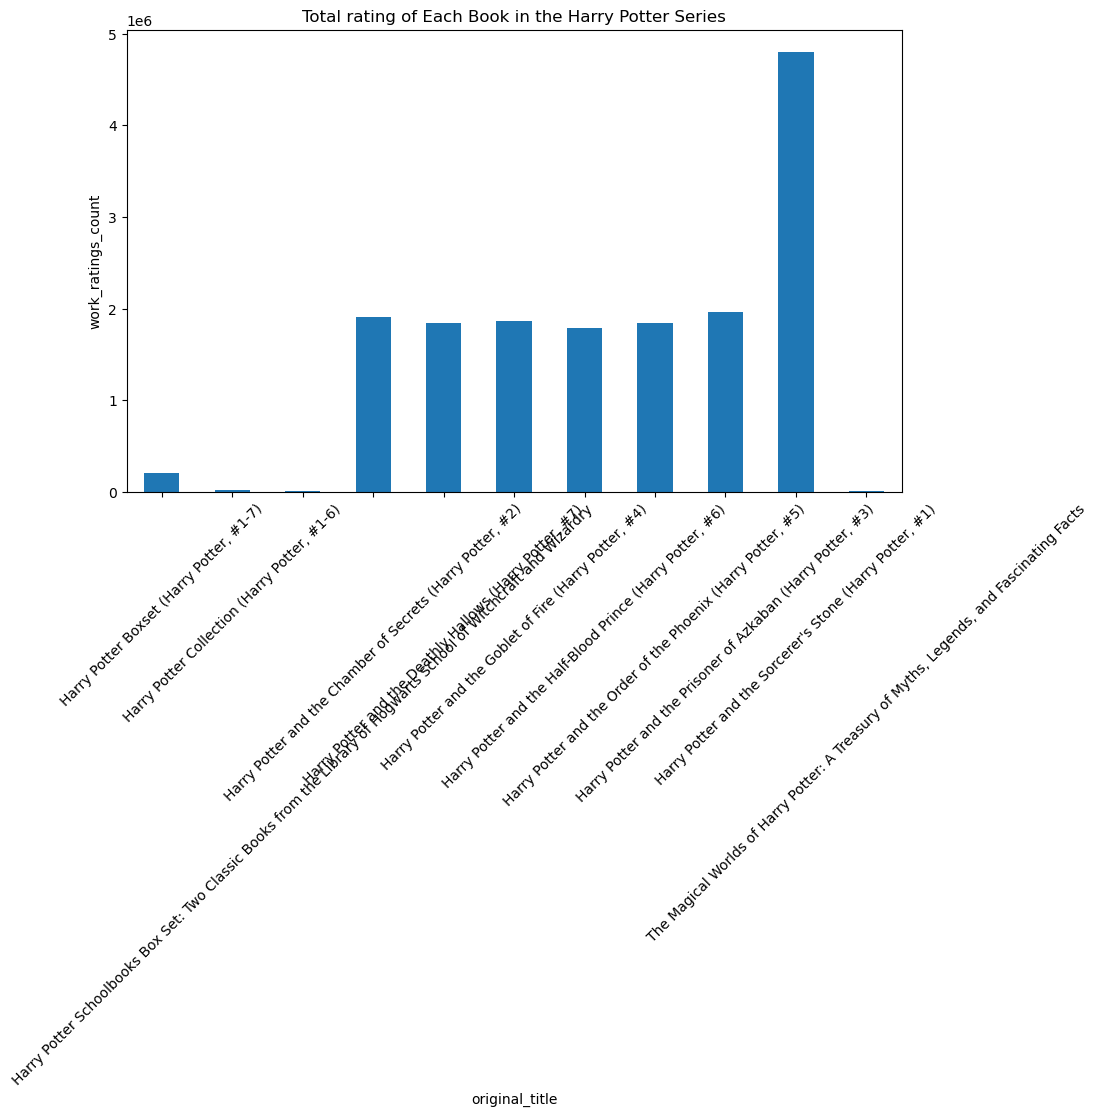

In [62]:
# total rating for each book in the Harry Potter series
sales_per_book.plot(kind='bar', figsize=(10, 6))
plt.xlabel('original_title')
plt.ylabel('work_ratings_count')
plt.title('Total rating of Each Book in the Harry Potter Series')
plt.xticks(rotation=45)
plt.show()
